<a href="https://colab.research.google.com/github/JoungMinJu/machine_learning/blob/main/4%EC%9E%A5/%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

훈련데이터가 한 번에 준비되는 것이 아니라 조금씩 전달된다.

새로운 데이터를 항상 추가해서 학습하면 데이터가 계속 늘어날 것 ㅠㅠ
원래있던 데이터를 버려버리기엔 중요한 데이터가 포함되어있을 확률을 배제할 수 없음

이미 있던 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련하는 것을 점진적 학습이라한다.

대표적인 점진적 학습 알고리즘이 확률적 경사하강법이다.

In [ ]:
#훈련세트를 한 번 모두 사용하는 과정을 에포크라고 부른다.
#확률적 경사 하강법은 수십, 수백번 이상 에포크를 사용한다.

#무작위로 몇개의 샘플을 선택해서 경사를 따라 내려가는 것을 '미니배치 경사하강법'이라한다.
#극단적으로 한 번 경사로를 따라 이동하기 위해 전체 샘플을 사용하는 것을 '배치 경사 하강법이라한다' 전체 데이터를 사용하므로 가장 안정적이지만 그만큼 컴퓨터 자원을 많이 사용한다.


확률적 경사 하강법을 꼭 사용하는 알고리즘이 '신경망 알고리즘' 신경망은 일반적으로 많은 데이터 사용하기 때문에 한 번에 모든 데이터를 사용하기 어렵다. 그래서 확률적 경사 하강법이나 미니배치 경사 하강법을 꼭 사용한다.


In [ ]:
#손실함수는 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지를 측정하는 기준이다. 
#손실함수 값이 작을수록 좋다. 어떤 값이 최솟값인지는 알지 못하지만 가능한 많이 찾아보고 만족할만한 수준이라면 산을 다 내려왔다고 인정해야한다. 


In [ ]:
#비용함수는 손실함수의 다른말이다. 엄밀히 말하면 손실함수는 샘플 하나에 대한 손실을 정의하고 비용함수는 훈련세트에 잇는 모든 샘플에 대한 손실함수의 합을 말한다. 
#근데 걍 섞어씀


In [ ]:
#산을 내려오는 것이 경사하강법이잖아? 그래서 손실함수가 미분가능해야한다. 

로지스틱 손실함수

In [ ]:
#양성클래스(타깃=1)일때 손실은 -log(예측확률)로 계산한다. 확률이 1에서 멀어질 수록 손실은 아주 큰 양수가 되다.
#음성클래스(타깃=0)일때 손실은 -log(1-예측확률)로 계산한다. 이 확률이 0에서 멀어질 수록 손실은 아주 큰 양수가 된다. 

In [ ]:
#이러한 함수를 로지스틱 손실함수(=이진크로스엔트로피 손실함수)라고 한다. 
#손실함수를 사용하면 로지스틱 회귀모델이 만들어진다.


In [ ]:
#다중분류에서 사용하는 손실함수는 크로스엔트로피손실함수이다. 

#손실함수를 직접 계산하는 일은 드무니까 손실함수의 의미에 대해서만 알고있는게 중요하다.



SGDClassifier

In [1]:
import pandas as pd
fish=pd.read_csv('https://bit.ly/fish_csv')

In [2]:
fish_input=fish[['Weight','Length','Diagonal','Height','Width']]
fish_target=fish['Species'].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(fish_input, fish_target, random_state=42)

In [5]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_input)
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [6]:
from sklearn.linear_model import SGDClassifier
#확률경사 하강법을 제공하는 대표적인 분류용 클래스


In [7]:
sc=SGDClassifier(loss='log',max_iter=10, random_state=42) #손실함수의 종류를 로지스틱 손실함수로 지정. 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#정확도가 낮구만요 반복횟수 10번이 부족해서 그런 것으로 보인다.

0.7983193277310925
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [8]:
#모델을 이어서 훈련할 것! 이떄는 partial_fit()을 사용한다. fit()이랑 사용법이 같지만 호출할 때마다 1에포크씩 이어서 훈련할 수 있다. 
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#정확도가 조금 더 향상되긴했음. 여러번 에포크해서 훈련해봐야겠군. 얼마나 더 많이해야할지 기준이 필요하다

0.8235294117647058
0.875


In [ ]:
#확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소적합이나 과대적합이 될 수 있다.

#에포크 횟수가 적으면 모델이 훈련세트를 덜 학습한다. 에포크 횟수가 충분히 많으면 훈련세트 완전히 학습할 것
#긍까 적은 에포크 횟수 동안에 훈련한 모델은 훈련세트와 테스트 세트에 잘 맞지 않는 과소적합된 모델일 가능성이 높다.
#반대로 많은 에포크 횟수동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.


#과대적합이 시작하기 전에 훈련을 멈추는 것을 조기종료라고한다.

#에포크마다 훈련세트와 테스트 세트에 대한 점수를 기록하기 위해 리스트를 준비


In [9]:
import numpy as np
sc=SGDClassifier(loss='log', random_state=42)
train_score=[]
test_score=[]
classes=np.unique(train_target)

In [10]:
for _ in range(0,300): #300번의 에포크 동안 훈련을 반복하여 진행! 반복마다 훈련세트와 테스트 세트의 점수를 게산하여 train_score, test_score리스트에 추가

  #partia_fil() 메소드만 사용하려면 훈련세트에 있는 전체 클래스의 레이블을 partial_fit()메서드에 전달해주어야한다. 
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))
  


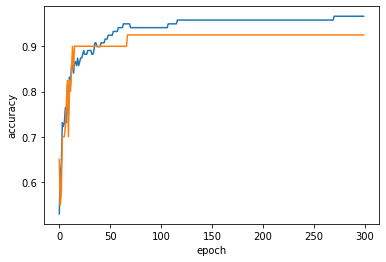

In [12]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

#300번의 에포크 동안 기록한 훈련세트와 테스트 세트의 점수를 그래프로 그려본것
#백번째 에포크 이후에는 훈련세트와 테스트 세트의 점수가 조금씩 벌어지고 있따. 
#에포크 초기에는 과소적합되어 훈련세트와 테스트 세트의 점수가 낮다. 이 모델의 경우 적합한 반복 횟수는 100번째 에포크라고 보인다.

In [13]:
sc=SGDClassifier(loss='log',max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

#SGDClassifier는 일정 에포크 동안 성능이 향상되지 않으면 더 훈련하지 않고 자동으로 멈춘다.
#tol 매개변수에서 향상될 최솟값을 지정한다. 여기서는 None으로 지정하여 자동으로 멈추지 않고 max_iter 100만큼 무조건 반복하도록 하였따

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=100,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=None, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [15]:
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled,test_target))

0.957983193277311
0.925


In [ ]:
#정확도가 비교적 높게 나온 것을 통해 분류문제를 잘 수행했음을 파악할 수 있따.


#확률적 경사 하강법을 사용한 회귀모델은 SGDRegressor!!!!!!!!!!!!!!!!!!!!!!!!!!


#loss 매개변수의 기본값은 hinge이다. 
#힌지손실은 서포트벡터머신이라 불리는 알고리즘을 위한 손실함수이다. 
# 중요한건SGDClassifier가 여러 종류의 손실함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원한다는 것!!




In [16]:
#간단한 예로 힌지손실을 사용해 같은 반복횟수동안 모델 훈련해본 것

sc=SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
